In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import json
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, cross_validate
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import re
import numpy as np
import pymorphy2
from collections import defaultdict
from datetime import datetime

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import ElasticNet

# –í –∫–∞—á–µ—Å—Ç–≤–µ —Å–∞–π—Ç–∞ –±—ã–ª –≤—ã–±—Ä–∞–Ω https://www.banki.ru/services/responses/bank/tcs/?page=1&is_countable=on

# –ë–∞–Ω–∫: –¢–∏–Ω—å–∫–æ—Ñ—Ñ, –£—Å–ª—É–≥–∏: –í—Å–µ, –û—Ç–∑—ã–≤—ã: –ü—Ä–æ–≤–µ—Ä–µ–Ω–Ω—ã–µ, –û—Ü–µ–Ω–∫–∞: –õ—é–±–∞—è –æ—Ü–µ–Ω–∫–∞

–ó–∞–≥—Ä—É–∑–∫–∞ —Å—Ç—Ä–∞–Ω–∏—Ü –∏ –ø–æ–ª—É—á–µ–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –∏–∑ json —Å—Ç—Ä—É–∫—Ç—É—Ä—ã, –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤ —Å–ø–∏—Å–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± –≤—Å–µ—Ö –æ—Ç–∑—ã–≤–∞—Ö

In [ ]:
%%time
url = "https://www.banki.ru/services/responses/bank/tcs/?page=1&is_countable=on"
err = 0
i = 1
review_all = []
while err != 1:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html")
    review_info = soup.find_all("script", type="application/ld+json")[0].text.replace('&lt;p&gt;', '').replace('&lt;br&gt;', '').replace('&lt;/p&gt;', ' ').replace('\r', '').replace('\n', '').replace('\t', '').replace('\\', '').replace('\xa0', '')
    review_info = json.loads(review_info)
    if len(review_info['review']) == 0:
        err = 1
    else:
        review_all.append(review_info)
        print(f'–°—Ç—Ä–∞–Ω–∏—Ü–∞ {i} –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞')
        i += 1
        url = f"https://www.banki.ru/services/responses/bank/tcs/?page={i}&is_countable=on"
        review_all.append(review_info)

–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 2 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 3 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 4 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 5 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 6 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 7 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 8 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 9 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 10 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 11 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 12 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 13 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 14 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 15 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 16 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 17 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 18 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 19 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 20 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 21 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 22 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 23 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 24 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 25 –æ–±—

–°—Ç—Ä–∞–Ω–∏—Ü–∞ 347 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 348 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 349 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 350 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 351 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 352 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 353 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 354 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 355 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 356 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 357 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 358 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 359 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 360 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 361 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 362 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 363 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 364 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 365 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 366 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 367 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 368 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 369 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 370 –æ–±—Ä–∞–±–æ—

–°—Ç—Ä–∞–Ω–∏—Ü–∞ 689 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 690 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 691 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 692 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 693 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 694 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 695 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 696 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 697 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 698 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 699 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 700 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 701 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 702 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 703 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 704 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 705 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 706 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 707 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 708 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 709 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 710 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 711 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 712 –æ–±—Ä–∞–±–æ—

–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1030 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1031 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1032 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1033 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1034 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1035 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1036 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1037 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1038 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1039 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1040 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1041 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1042 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1043 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1044 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1045 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1046 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1047 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1048 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1049 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1050 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1051 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1052 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–

–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1358 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1359 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1360 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1361 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1362 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1363 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1364 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1365 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1366 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1367 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1368 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1369 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1370 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1371 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1372 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1373 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1374 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1375 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1376 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1377 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1378 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1379 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–∏—Ü–∞ 1380 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞
–°—Ç—Ä–∞–Ω–

In [ ]:
print(review_all[0])

{'@context': 'http://schema.org', '@type': 'Organization', 'aggregateRating': {'@type': 'AggregateRating', 'ratingValue': '4.02182', 'reviewCount': '40086', 'bestRating': '5', 'worstRating': '1'}, 'name': '–¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫', 'review': [{'@type': 'Review', 'author': 'user8025764', 'datePublished': '2023-09-08 15:03:31', 'description': '08.09. 23 —è –æ–±—Ä–∞—Ç–∏–ª–∞—Å—å –≤ —á–∞—Ç –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –±–∞–Ω–∫–∞ —Å –ø—Ä–æ–±–ª–µ–º–æ–π –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ, –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ —Å –∂–∞–ª–æ–±–æ–π –Ω–∞ —Å–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ –≤ –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –Ø –Ω–µ –∑–Ω–∞–ª–∞, —á—Ç–æ –ø–ª–∞—Ç–µ–∂–∏ –ø—Ä–æ—Ö–æ–¥—è—Ç –∫–∞–∫ –±–∞–Ω–∫–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ–≤–æ–¥ –Æ–õ –∏ –µ—Å—Ç—å –ª–∏–º–∏—Ç –Ω–∞ –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–µ –ø–µ—Ä–µ–≤–æ–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ —è –∏—Å—á–µ–∑–∞–ª–∞. –í –∏—Ç–æ–≥–µ –∑–∞ 3000 –æ–ø–ª–∞—Ç –∑–∞ –¥–µ—Ç—Å–∫–∏–π —Å–∞–¥ —Å –º–µ–Ω—è —Å–Ω—è–ª–∏ 350‚ÇΩ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –∑–∞ 1 –¥–µ–Ω—å. –ú–æ–µ–º—É –≤–æ–∑–º—É

# –ó–∞–ø–∏—à–µ–º –≤—Å–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ–± –æ—Ç–∑—ã–≤–∞—Ö –≤ —Ñ–∞–π–ª review_all.json –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–π –∑–∞–≥—Ä—É–∑–∫–∏ –ø—Ä–∏ –Ω–æ–≤–æ–º –∑–∞–ø—É—Å–∫–µ —Ñ–∞–π–ª–∞

In [ ]:
# with open('review_all.json', 'w') as file:
#     json.dump(review_all, file)

# print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_all.json'.")

–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_all.json'.


In [ ]:
review_all = []
with open('review_all.json', 'r') as file:
    review_all = json.load(file)

–§–æ—Ä–º–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ —Å–∞–º–∏—Ö –æ—Ç–∑—ã–≤–æ–≤, —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ –∏ –¥–∞—Ç

In [ ]:
review, rating, date = [], [], []
for review_info in review_all:
    for rev in review_info['review']:
        review.append(rev['description'])
        rating.append(rev['reviewRating']['ratingValue'])
        date.append(rev['datePublished'].split()[0])
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ –∏ –æ—Ç–∑—ã–≤–æ–≤: {len(rating)}, {len(review)}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ –∏ –æ—Ç–∑—ã–≤–æ–≤: 74966, 74966


# –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö

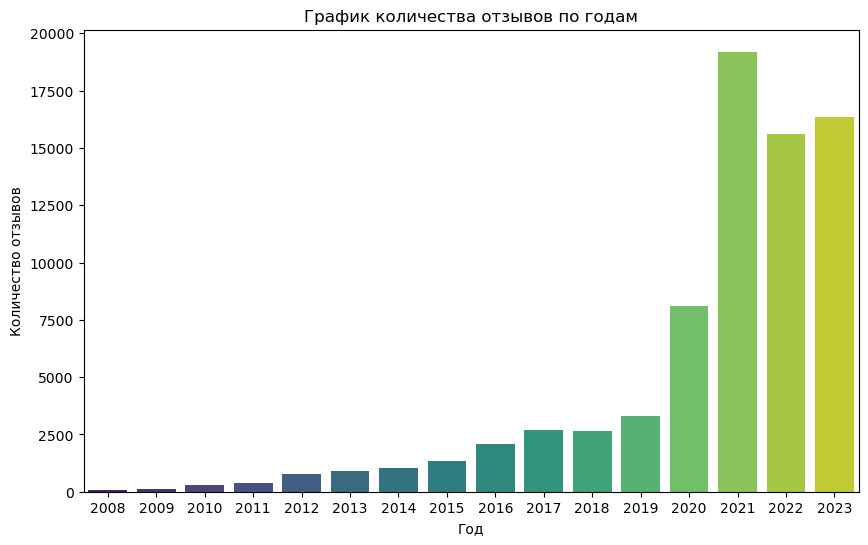

In [ ]:
reviews_by_year = defaultdict(int)

for date_str in date:
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    year = date_obj.strftime("%Y")
    reviews_by_year[year] += 1

data = {'–ì–æ–¥': list(reviews_by_year.keys())[::-1], '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤': list(reviews_by_year.values())[::-1]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='–ì–æ–¥', y='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤', data=df, palette='viridis');
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –≥–æ–¥–∞–º');

–ò–∑ –¥–∏–∞–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –∫–∞–∂–¥—ã–π –≥–æ–¥ —á–∏—Å–ª–æ –æ—Ç–∑—ã–≤–æ–≤ —Ä–æ—Å–ª–æ, –º–∞–∫—Å–∏–º—É–º –±—ã–ª –≤ 2021 –≥–æ–¥—É, —Ä–µ–∑–∫–∏–π —Ä–æ—Å—Ç –æ—Ç–∑—ã–≤–æ–≤ –ø—Ä–æ–∏–∑–æ—à–µ–ª –≤ 2020 –∏ 2021 –≥–æ–¥–∞—Ö. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ä–æ—Å—Ç–æ–º –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ –±–∞–Ω–∫–∞

In [ ]:
pd.Series(rating).value_counts()

5        37378
1        25544
2         5360
4         4040
3         2566
4.759       40
1.466       22
3.388       16
dtype: int64

–í–∏–¥–∏–º, —á—Ç–æ –±—ã–ª–∏ –æ—Ç–∑—ã–≤—ã —Å –Ω–µ—Ü–µ–ª—ã–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏

In [ ]:
for rate in range(len(rating)):
    if rating[rate] == '3.388':
        rating[rate] = 3
    if rating[rate] == '4.759':
        rating[rate] = 5
    if rating[rate] == '1.466':
        rating[rate] = 1
    else:
        rating[rate] = int(rating[rate])

print(rating[-150:])
# with open('review_rating.json', 'w') as file:
#     json.dump(rating, file)
# print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_rating.json'.")

[5, 1, 5, 4, 5, 2, 3, 5, 5, 4, 5, 5, 5, 5, 1, 3, 5, 1, 5, 3, 5, 5, 5, 4, 2, 5, 1, 5, 4, 5, 2, 3, 5, 5, 1, 4, 5, 1, 3, 2, 5, 5, 4, 4, 5, 1, 1, 4, 1, 4, 5, 3, 3, 5, 4, 5, 1, 3, 1, 1, 4, 5, 1, 3, 2, 5, 5, 4, 4, 5, 1, 1, 4, 1, 4, 5, 3, 3, 5, 4, 5, 1, 3, 1, 5, 5, 3, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 1, 1, 3, 5, 1, 1, 1, 1, 5, 5, 5, 3, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 1, 1, 3, 5, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1]


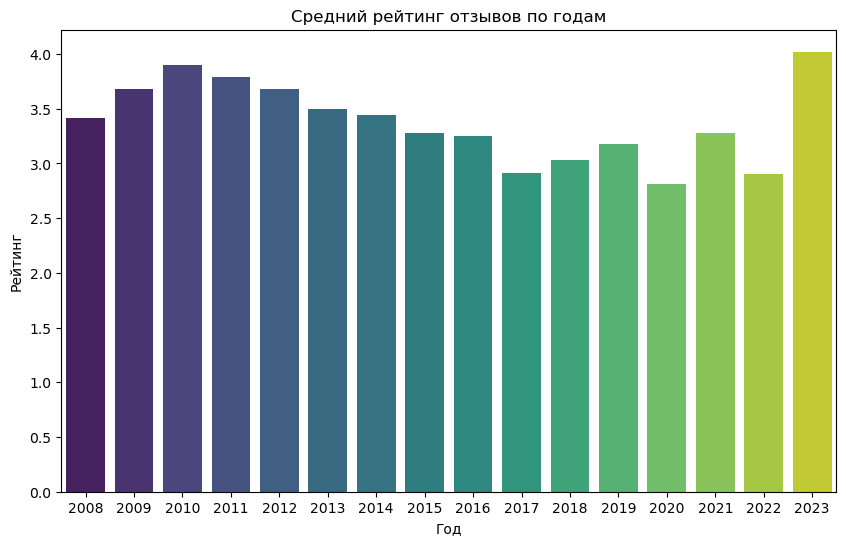

In [ ]:
years = [datetime.strptime(date_str, "%Y-%m-%d").year for date_str in date]

data = {'–ì–æ–¥': years, '–†–µ–π—Ç–∏–Ω–≥': rating}
df = pd.DataFrame(data)

mean_ratings_by_year = df.groupby('–ì–æ–¥')['–†–µ–π—Ç–∏–Ω–≥'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='–ì–æ–¥', y='–†–µ–π—Ç–∏–Ω–≥', data=mean_ratings_by_year, palette='viridis');
plt.title('–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –≥–æ–¥–∞–º');

–í —Ü–µ–ª–æ–º –ø–æ –∫–∞–∂–¥–æ–º—É –≥–æ–¥—É —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –æ—Ç 3 –¥–æ 3.5. –í 2023 –≥–æ–¥—É —Å—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –±—ã–ª –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∑–∞ –≤—Å–µ –≥–æ–¥–∞

–ó–∞–ø–∏—à–µ–º —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ñ–∞–π–ª review_decription.json

In [ ]:
# with open('review_description.json', 'w') as file:
#     json.dump(review, file)
# print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_description.json'.")

–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_description.json'.


–ó–∞–ø–∏—à–µ–º —Ä–µ–π—Ç–∏–Ω–≥–∏ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ñ–∞–π–ª review_rating.json

In [ ]:
# with open('review_rating.json', 'w') as file:
#     json.dump(rating, file)
# print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_rating.json'.")

–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_rating.json'.


In [ ]:
print(review[-2])
print(rating[-2])

–ü–æ–ª—É—á–∏–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –æ—Ç –±–∞–Ω–∫–∞, –∑–∞–ø–æ–ª–Ω–∏–ª –∞–Ω–∫–µ—Ç—É, –æ—Ç–ø—Ä–∞–≤–∏–ª. –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –∫–∞—Ä—Ç—ã –ø–æ–∑–≤–æ–Ω–∏–ª –≤ —Ü–µ–Ω—Ç—Ä –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, —É—Ç–æ—á–Ω–∏–ª –≤—Å–µ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–µ –º–µ–Ω—è –≤–æ–ø—Ä–æ—Å—ã, –∞ –∏–º–µ–Ω–Ω–æ: –ø–æ–∫—É–ø–∫–∏ –±–µ–∑–Ω–∞–ª–æ–º –∏ –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –í—Å–µ –¥–æ—Å—Ç—É–ø–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏. –ê–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–ª –∫–∞—Ä—Ç—É. –ü–æ–ª—å–∑—É—é—Å—å –∫–∞—Ä—Ç–æ–π 3 –º–µ—Å—è—Ü–∞ —Ç–æ–ª—å–∫–æ &quot;–≥—Ä–µ–π—Å–æ–º&quot;(0% –¥–æ 55 –¥–Ω–µ–π –ø—Ä–∏ –±–µ–∑–Ω–∞–ª–∏—á–Ω–æ–º —Ä–∞—Å—á–µ—Ç–µ), —Å –ø–æ–º–æ—â—å—é –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –≤–∏–∂—É, —Å–∫–æ–ª—å–∫–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø–ª–∞—Ç–∏—Ç—å –∏ –¥–æ –∫–∞–∫–æ–≥–æ —á–∏—Å–ª–∞. –ü–µ—Ä–µ–ø–ª–∞—Ç–∏–ª —Ç–æ–ª—å–∫–æ 590 —Ä—É–±. (–ø–ª–∞—Ç–∞ –∑–∞ –µ–∂–µ–≥–æ–¥–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ). –ù–µ–¥–∞–≤–Ω–æ –º–Ω–µ —É–≤–µ–ª–∏—á–∏–ª–∏ –ª–∏–º–∏—Ç –ø–æ –∫–∞—Ä—Ç–µ. –í –æ–±—â–µ–º, –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç. :)
5


# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑ —Ñ–∞–π–ª–æ–≤ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫

In [ ]:
with open('review_description.json', 'r') as file:
    review = json.load(file)
print(review[-2])

–ü–æ–ª—É—á–∏–ª –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –æ—Ç –±–∞–Ω–∫–∞, –∑–∞–ø–æ–ª–Ω–∏–ª –∞–Ω–∫–µ—Ç—É, –æ—Ç–ø—Ä–∞–≤–∏–ª. –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –∫–∞—Ä—Ç—ã –ø–æ–∑–≤–æ–Ω–∏–ª –≤ —Ü–µ–Ω—Ç—Ä –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, —É—Ç–æ—á–Ω–∏–ª –≤—Å–µ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–µ –º–µ–Ω—è –≤–æ–ø—Ä–æ—Å—ã, –∞ –∏–º–µ–Ω–Ω–æ: –ø–æ–∫—É–ø–∫–∏ –±–µ–∑–Ω–∞–ª–æ–º –∏ –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –í—Å–µ –¥–æ—Å—Ç—É–ø–Ω–æ –æ–±—ä—è—Å–Ω–∏–ª–∏. –ê–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–ª –∫–∞—Ä—Ç—É. –ü–æ–ª—å–∑—É—é—Å—å –∫–∞—Ä—Ç–æ–π 3 –º–µ—Å—è—Ü–∞ —Ç–æ–ª—å–∫–æ &quot;–≥—Ä–µ–π—Å–æ–º&quot;(0% –¥–æ 55 –¥–Ω–µ–π –ø—Ä–∏ –±–µ–∑–Ω–∞–ª–∏—á–Ω–æ–º —Ä–∞—Å—á–µ—Ç–µ), —Å –ø–æ–º–æ—â—å—é –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞ –≤—Å–µ–≥–¥–∞ –≤–∏–∂—É, —Å–∫–æ–ª—å–∫–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø–ª–∞—Ç–∏—Ç—å –∏ –¥–æ –∫–∞–∫–æ–≥–æ —á–∏—Å–ª–∞. –ü–µ—Ä–µ–ø–ª–∞—Ç–∏–ª —Ç–æ–ª—å–∫–æ 590 —Ä—É–±. (–ø–ª–∞—Ç–∞ –∑–∞ –µ–∂–µ–≥–æ–¥–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ). –ù–µ–¥–∞–≤–Ω–æ –º–Ω–µ —É–≤–µ–ª–∏—á–∏–ª–∏ –ª–∏–º–∏—Ç –ø–æ –∫–∞—Ä—Ç–µ. –í –æ–±—â–µ–º, –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç. :)


In [ ]:
with open('review_rating.json', 'r') as file:
    rating = json.load(file)
print(rating[-2])

5


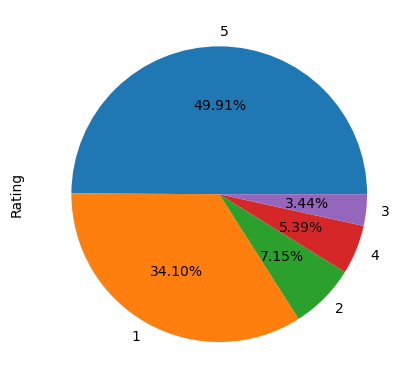

In [ ]:
pd.Series(rating).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

# –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω–∏—Ç—å –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤

–ü–æ—Ä–∞–±–æ—Ç–∞–µ–º —Å —Ç–µ–∫—Å—Ç–æ–≤—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏, —É–¥–∞–ª–∏–º —Å—Ç–æ–ø —Å–ª–æ–≤–∞, –ø—Ä–∏–≤–µ–¥–µ–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É, —É–¥–∞–ª–∏–º –∑–Ω–∞–∫–∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ –≤—ã–ø–æ–ª–Ω–∏–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é

In [ ]:
stop_words = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in stop_words and word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text
review = [preprocess_text(rev) for rev in review]
review[-2]

In [ ]:
# with open('review_description_preprocess.json', 'w') as file:
#     json.dump(review, file)
# print("–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_description_preprocess.json'.")

–°–æ–¥–µ—Ä–∂–∏–º–æ–µ —Å–ø–∏—Å–∫–∞ –∑–∞–ø–∏—Å–∞–Ω–æ –≤ —Ñ–∞–π–ª 'review_description_preprocess.json'.


# –ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –∏–∑ —Ñ–∞–π–ª–∞

In [ ]:
with open('review_description_preprocess.json', 'r') as file:
    review = json.load(file)
print(review[-2])

–ø–æ–ª—É—á–∏—Ç—å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –±–∞–Ω–∫ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –∞–Ω–∫–µ—Ç–∞ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—Ä—Ç–∞ –ø–æ–∑–≤–æ–Ω–∏—Ç—å —Ü–µ–Ω—Ç—Ä –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ —É—Ç–æ—á–Ω–∏—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å –≤–æ–ø—Ä–æ—Å –∏–º–µ–Ω–Ω–æ –ø–æ–∫—É–ø–∫–∞ –±–µ–∑–Ω–∞–ª –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –¥–æ—Å—Ç—É–ø–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ä—Ç–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞—Ä—Ç–∞ 3 –º–µ—Å—è—Ü –≥—Ä–µ–π—Å 0 55 –¥–µ–Ω—å –±–µ–∑–Ω–∞–ª–∏—á–Ω—ã–π —Ä–∞—Å—á—ë—Ç –ø–æ–º–æ—â—å –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∞ –≤–∏–¥–µ—Ç—å —Å–∫–æ–ª—å–∫–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø–ª–∞—Ç–∏—Ç—å –∫–∞–∫–æ–π —á–∏—Å–ª–æ –ø–µ—Ä–µ–ø–ª–∞—Ç–∏—Ç—å 590 —Ä—É–± –ø–ª–∞—Ç–∞ –µ–∂–µ–≥–æ–¥–Ω—ã–π –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –Ω–µ–¥–∞–≤–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –ª–∏–º–∏—Ç –∫–∞—Ä—Ç–∞ –æ–±—â–∏–π —É—Å—Ç—Ä–∞–∏–≤–∞—Ç—å


–°–∞–º—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ–º—ã–µ —Å–ª–æ–≤–∞ –≤ –æ—Ç–∑—ã–≤–∞—Ö

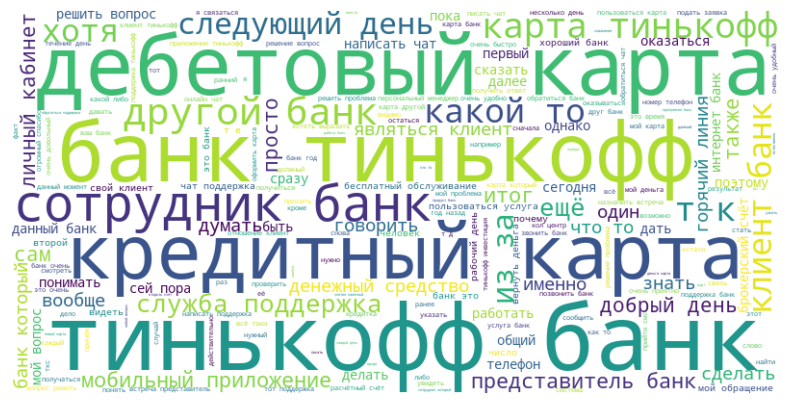

In [ ]:
text = " ".join(review)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

–û–±–ª–∞–∫–∞ —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞

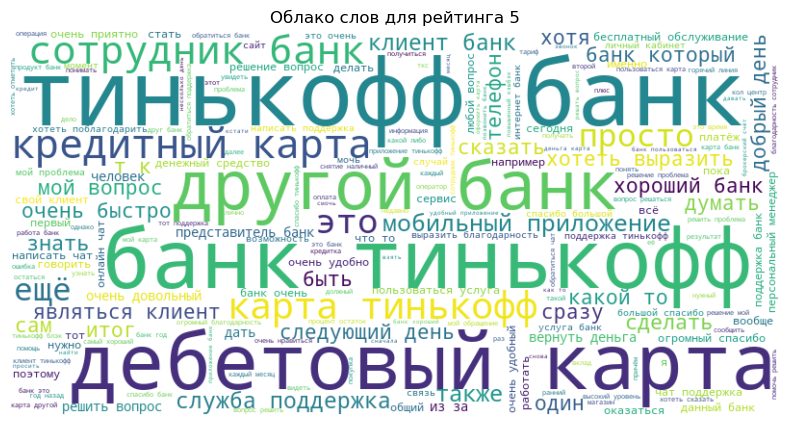

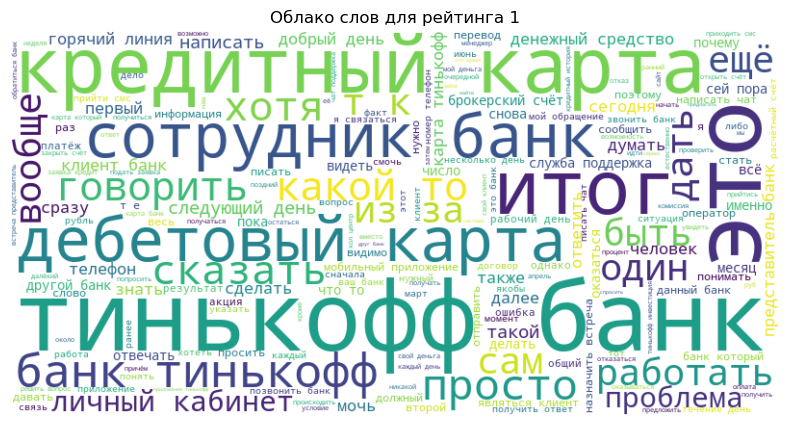

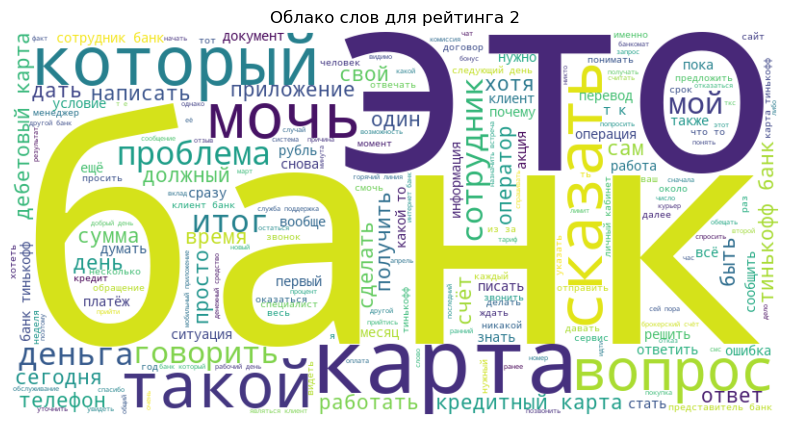

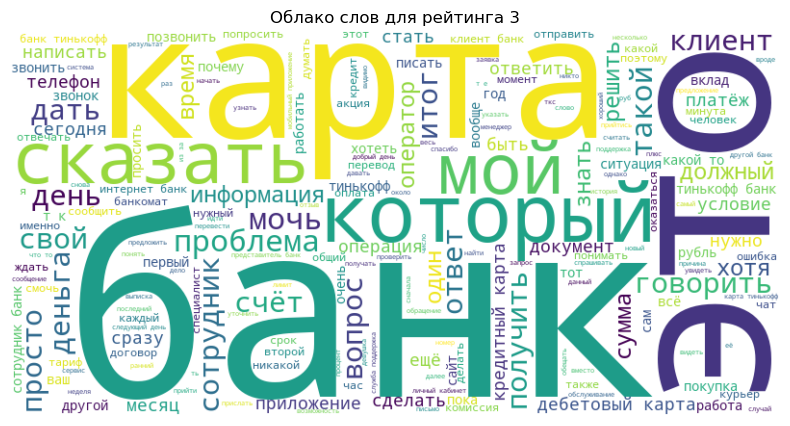

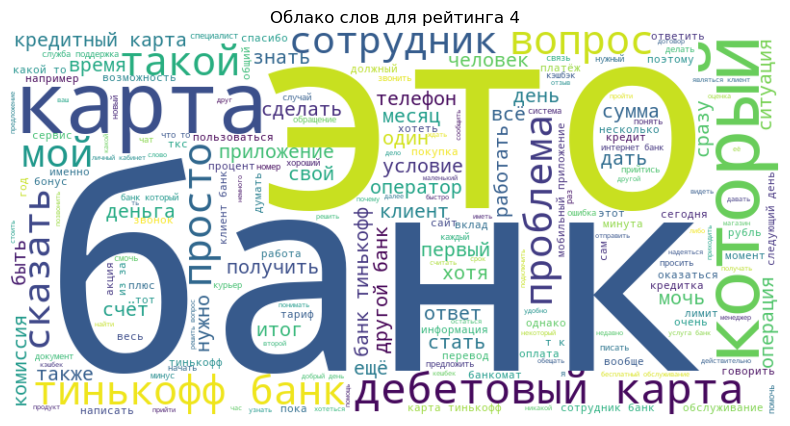

In [ ]:
reviews_by_rating = {}

for i in range(len(review)):
    rating_cur = rating[i]
    review_cur = review[i]

    if rating_cur not in reviews_by_rating:
        reviews_by_rating[rating_cur] = []

    reviews_by_rating[rating_cur].append(review_cur)

for rating, reviews_list in reviews_by_rating.items():
    text = " ".join(reviews_list)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è —Ä–µ–π—Ç–∏–Ω–≥–∞ {rating}')
    plt.axis('off')
    plt.show()

–≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ, –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [ ]:
vectorizer = TfidfVectorizer()
def vectorize(review, vectorizer):
    review_tfidf = vectorizer.fit_transform(review)
    return review_tfidf
review_tfidf = vectorize(review, vectorizer)

# –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ —á–µ—Ä–µ–∑ SMOTE

In [ ]:
def balance(review, rating):
    oversample = SMOTE()
    review_oversample, rating_oversample = oversample.fit_resample(review, rating)
    return review_oversample, rating_oversample
review_oversample, rating_oversample = balance(review_tfidf, rating)

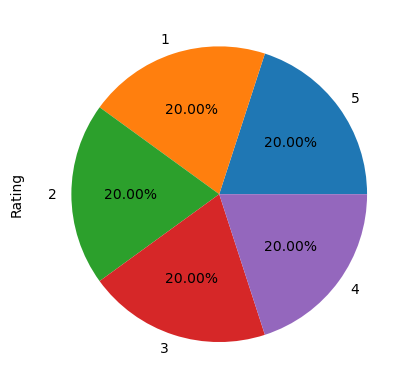

In [ ]:
pd.Series(rating_oversample).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

In [ ]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ–µ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫ –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: {review_oversample.shape[0]}, {len(rating_oversample)}')
print(review_oversample.shape)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ–µ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫ –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: 187090, 187090
(187090, 74789)


# –ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª–∏, –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å review_tfidf (—Ç.–µ –µ—â–µ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã)

In [ ]:
def train_run_models(X, y):
    metrics = {
        'Accuracy': make_scorer(accuracy_score),
        'Precision': make_scorer(precision_score, average='macro'),
        'Recall': make_scorer(recall_score, average='macro'),
        'F1-Score': make_scorer(f1_score, average='macro')
    }

    models = [
        ('PassiveAggressiveClassifier', PassiveAggressiveClassifier()),
        ('RidgeClassifier', RidgeClassifier()),
        ('–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä', MultinomialNB()),
        ('–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è', LogisticRegression()),
        ('–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å', ComplementNB()),
        ('–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º', LinearSVC()),
        ('Stochastic Gradient Descent', SGDClassifier())
            ]

    acc_dict = {}
    for name, model in models:
        model_scores = {}

        start_time = time.time()

        for metric_name, scorer in metrics.items():
            cv_results = cross_val_score(model, X, y, cv=5, scoring=scorer, n_jobs=-1)
            model_scores[metric_name] = cv_results.mean()

        end_time = time.time()
        training_time = round(end_time - start_time, 2)

        model_scores['Training Time'] =  training_time
        acc_dict[name] = model_scores
        print(f'{name} –æ–±—É—á–µ–Ω–∞ –∑–∞ {training_time}')

    acc_df = pd.DataFrame.from_dict(acc_dict, orient='index')
    display(acc_df)

In [ ]:
%%time
train_run_models(review_tfidf, rating)

PassiveAggressiveClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 56.91
RidgeClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 94.2
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—É—á–µ–Ω–∞ –∑–∞ 4.1
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ–±—É—á–µ–Ω–∞ –∑–∞ 231.76
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å –æ–±—É—á–µ–Ω–∞ –∑–∞ 3.19
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º –æ–±—É—á–µ–Ω–∞ –∑–∞ 51.95
Stochastic Gradient Descent –æ–±—É—á–µ–Ω–∞ –∑–∞ 16.17


Accuracy  Precision    Recall  \
PassiveAggressiveClassifier              0.711789   0.412225  0.401274   
RidgeClassifier                          0.787584   0.518461  0.387621   
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.779407   0.310586  0.368484   
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.789478   0.453881  0.397159   
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.781234   0.389142  0.373232   
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.764906   0.442492  0.401395   
Stochastic Gradient Descent              0.804204   0.428118  0.384906   

                                         F1-Score  Training Time  
PassiveAggressiveClassifier              0.401005          56.91  
RidgeClassifier                          0.367005          94.20  
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.336143           4.10  
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.377851         231.76  
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.341689           3.19  
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.394819          51.95  
Stochastic Gradient Descent              0.350889          16.17

Wall time: 7min 38s


–ù–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å Stochastic Gradient Descent (–ª—É—á—à–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ –±—ã—Å—Ç—Ä–æ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è), –ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∏ –ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å –æ–±—É—á–∞—é—Ç—Å—è –≥–æ—Ä–∞–∑–¥–æ –±—ã—Å—Ç—Ä–µ–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

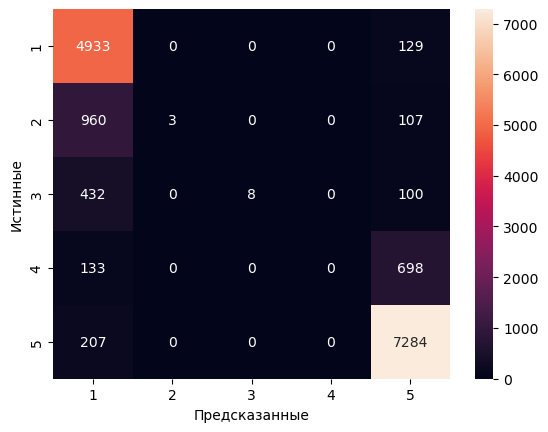

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_tfidf, rating, test_size=0.2, random_state=22)

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

y_pred = sgd_classifier.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ')
plt.show()

–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç, —á—Ç–æ –ª—É—á—à–µ –≤—Å–µ–≥–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –æ—Ç–∑—ã–≤—ã —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 1 –∏ 5 (–Ω–µ—É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, –≤–µ–¥—å –∏—Ö –≤ —Ä–∞–∑—ã –±–æ–ª—å—à–µ, —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã—Ö), –∞ –º–æ–¥–µ–ª—å —á–∞—Å—Ç–æ –ø—É—Ç–∞–µ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ —Å 1 –∏ 5 —Ä–µ–π—Ç–∏–Ω–≥–∞–º–∏

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.97      0.84      5062
           2       1.00      0.00      0.01      1070
           3       1.00      0.01      0.03       540
           4       0.00      0.00      0.00       831
           5       0.88      0.97      0.92      7491

    accuracy                           0.82     14994
   macro avg       0.72      0.39      0.36     14994
weighted avg       0.79      0.82      0.75     14994



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# –¢–µ–ø–µ—Ä—å –∂–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã

In [ ]:
%%time
train_run_models(review_oversample, rating_oversample)

PassiveAggressiveClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 115.68
RidgeClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 416.29
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—É—á–µ–Ω–∞ –∑–∞ 12.66
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ–±—É—á–µ–Ω–∞ –∑–∞ 547.07
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å –æ–±—É—á–µ–Ω–∞ –∑–∞ 12.94
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º –æ–±—É—á–µ–Ω–∞ –∑–∞ 200.49
Stochastic Gradient Descent –æ–±—É—á–µ–Ω–∞ –∑–∞ 55.97


Accuracy  Precision    Recall  \
PassiveAggressiveClassifier              0.947571   0.950236  0.947741   
RidgeClassifier                          0.916324   0.920639  0.916322   
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.798108   0.811516  0.798106   
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.861516   0.865802  0.861514   
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.845096   0.848660  0.845095   
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.930873   0.935523  0.930871   
Stochastic Gradient Descent              0.782335   0.781063  0.782729   

                                         F1-Score  Training Time  
PassiveAggressiveClassifier              0.946024         115.68  
RidgeClassifier                          0.913279         416.29  
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.788429          12.66  
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.857742         547.07  
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.840653          12.94  
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.928287         200.49  
Stochastic Gradient Descent              0.779366          55.97

Wall time: 22min 41s


–ù–∞ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –≤—ã—Ä–æ—Å–ª–∏, –æ—Å–æ–±–µ–Ω–Ω–æ —Ö–æ—Ä–æ—à–æ –ø—Ä–æ—è–≤–∏–ª–∏ —Å–µ–±—è –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º, RidgeClassifier, PassiveAggressiveClassifier

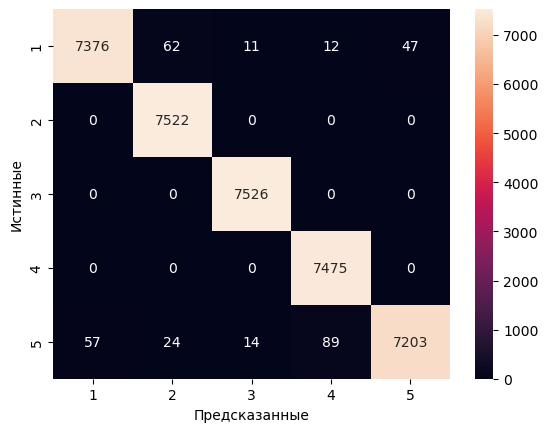

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(review_oversample, rating_oversample, test_size=0.2, random_state=42)

pa_classifier = PassiveAggressiveClassifier()
pa_classifier.fit(X_train, y_train)

y_pred = pa_classifier.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      7508
           2       0.99      1.00      0.99      7522
           3       1.00      1.00      1.00      7526
           4       0.99      1.00      0.99      7475
           5       0.99      0.98      0.98      7387

    accuracy                           0.99     37418
   macro avg       0.99      0.99      0.99     37418
weighted avg       0.99      0.99      0.99     37418



–°–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã–µ –∫–ª–∞—Å—Å—ã –æ—Ç–ª–∏—á–Ω–æ –ø–æ–º–æ–≥–ª–∏ —É–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å, –≤—Å–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –æ—Ç–ª–∏—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è

# –¢–µ–ø–µ—Ä—å —Å–±–∞–ª–∞–Ω—Å–∏—Ä—É–µ–º –∫–ª–∞—Å—Å—ã –ø—É—Ç–µ–º —É–¥–∞–ª–µ–Ω–∏—è –æ—Ç–∑—ã–≤–æ–≤ –¥–æ –Ω–∞–∏–º–µ–Ω—å—à–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è

# –ë–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∞ —á–µ—Ä–µ–∑ RandomUnderSampler()

In [ ]:
undersampler = RandomUnderSampler()
review_undersample, rating_undersample = undersampler.fit_resample(review_tfidf, rating)
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ–µ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫ –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: {review_undersample.shape[0]}, {len(rating_undersample)}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ–µ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫ –ø–æ—Å–ª–µ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏: 12910, 12910


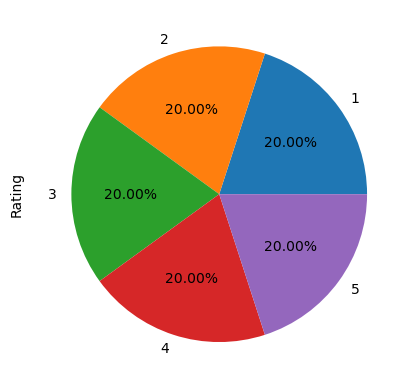

In [ ]:
pd.Series(rating_undersample).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

In [ ]:
%%time
train_run_models(review_undersample, rating_undersample)

PassiveAggressiveClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 12.14
RidgeClassifier –æ–±—É—á–µ–Ω–∞ –∑–∞ 8.25
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—É—á–µ–Ω–∞ –∑–∞ 1.25
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ–±—É—á–µ–Ω–∞ –∑–∞ 96.15
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å –æ–±—É—á–µ–Ω–∞ –∑–∞ 1.73
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º –æ–±—É—á–µ–Ω–∞ –∑–∞ 11.38
Stochastic Gradient Descent –æ–±—É—á–µ–Ω–∞ –∑–∞ 6.5


Accuracy  Precision    Recall  \
PassiveAggressiveClassifier              0.540976   0.528745  0.541367   
RidgeClassifier                          0.544771   0.532639  0.544774   
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.481565   0.527472  0.481582   
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.524322   0.514695  0.524331   
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.529899   0.528104  0.529907   
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.554686   0.542047  0.554691   
Stochastic Gradient Descent              0.528505   0.516986  0.531298   

                                         F1-Score  Training Time  
PassiveAggressiveClassifier              0.521690          12.14  
RidgeClassifier                          0.530855           8.25  
–ù–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä        0.487293           1.25  
–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è                  0.515145          96.15  
–ú—É–ª—å—Ç–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π –Ω–∞–∏–≤–Ω—ã–π –ë–∞–π–µ—Å           0.527064           1.73  
–ú–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –ª–∏–Ω–µ–π–Ω—ã–º —è–¥—Ä–æ–º  0.538880          11.38  
Stochastic Gradient Descent              0.518765           6.50

Wall time: 2min 17s


–î–∞–Ω–Ω—ã–π —Å–ø–æ—Å–æ–± –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –Ω–µ —É–≤–µ–Ω—á–∞–ª—Å—è —É—Å–ø–µ—Ö–æ–º

# –ü—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –æ—Ç–∑—ã–≤–∞—Ö, –≤–≤–µ–¥—ë–Ω–Ω—ã—Ö –≤—Ä—É—á–Ω—É—é

In [ ]:
stop_words = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

def preprocess_text(text):–ë–∞–Ω–∫ –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ç—Å—Ä–æ—á–∫–∏. –û–±–º–∞–Ω—É–ª. –ù–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –Ω–∏–∫–æ–º—É
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in stop_words and word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
input_review = ' '
while input_review != '':
    input_review = input()

    if input_review != '':
        my_review_prep = [preprocess_text(input_review)]
        my_review_tfidf = vectorizer.transform(my_review_prep)

        predicted_rating = pa_classifier.predict(my_review_tfidf)

        print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞: {predicted_rating[0]}\n")

–ë–∞–Ω–∫ –Ω–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ç—Å—Ä–æ—á–∫–∏. –û–±–º–∞–Ω—É–ª. –ù–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –Ω–∏–∫–æ–º—É
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞: 1


